# tracking_app

## see also

#### https://towardsdatascience.com/how-tracking-apps-analyse-your-gps-data-a-hands-on-tutorial-in-python-756d4db6715d

## Load Data

In [2]:
#Load the python packages
%load_ext autoreload
%autoreload
%matplotlib inline
import gpxpy
import matplotlib.pyplot as plt
import datetime
#from geopy import distance
from math import sqrt, floor
import numpy as np
import pandas as pd
#import haversine

## Data taken from Amazfit Stratos Watch


In [3]:
# Amazfit Stratos
gpx_file = open(
    './data/Zepp20200903214234.gpx', 'r'
)
gpx = gpxpy.parse(gpx_file)
print(gpx)

GPX(tracks=[GPXTrack(segments=[GPXTrackSegment(points=[...])])])


## Merge, Positions

In [4]:
data = gpx.tracks[0].segments[0].points
#print('data:', data)

# Start Position
start = data[0]
print('start:', start)

# End Position
finish = data[-1]
print('finish', finish)

('start:', GPXTrackPoint(48.218727, 16.369995, elevation=-2000000.0, time=datetime.datetime(2020, 6, 30, 18, 7, 18)))
('finish', GPXTrackPoint(48.21856, 16.369694, elevation=20317.0, time=datetime.datetime(2020, 6, 30, 18, 52, 18)))


## Dataframe

In [5]:
df = pd.DataFrame(columns=['lon', 'lat', 'alt', 'time'])
for point in data:
    df = df.append({'lon': point.longitude, 'lat' : point.latitude, 
                    'alt' : point.elevation, 'time' : point.time}, 
                   ignore_index=True)

df.describe()

,lon,lat,alt
count,959.000000,959.000000,9.590000e+02
mean,16.376966,48.215726,-1.939016e+03
std,0.007475,0.003547,2.052139e+05
min,16.367687,48.211530,-2.000000e+06
25%,16.370398,48.212499,1.873300e+04
50%,16.374466,48.214176,1.958000e+04
75%,16.383677,48.218645,1.958900e+04
max,16.392632,48.223454,2.067500e+04


## All the points

In [6]:
print(df['lon'])
print(df['lat'])

0      16.369995
1      16.369953
2      16.369920
3      16.369883
4      16.369870
5      16.369880
6      16.369907
7      16.369930
8      16.369940
9      16.369951
10     16.369968
11     16.369993
12     16.370018
13     16.370056
14     16.370096
15     16.370161
16     16.370213
17     16.370264
18     16.370327
19     16.370396
20     16.370459
21     16.370504
22     16.370560
23     16.370630
24     16.370697
25     16.370743
26     16.370808
27     16.370872
28     16.370932
29     16.371004
         ...    
929    16.370123
930    16.370190
931    16.370258
932    16.370329
933    16.370390
934    16.370462
935    16.370512
936    16.370504
937    16.370490
938    16.370464
939    16.370434
940    16.370400
941    16.370350
942    16.370289
943    16.370240
944    16.370188
945    16.370130
946    16.370092
947    16.370050
948    16.369987
949    16.369923
950    16.369854
951    16.369790
952    16.369837
953    16.369884
954    16.369830
955    16.369730
956    16.3696

## Plots

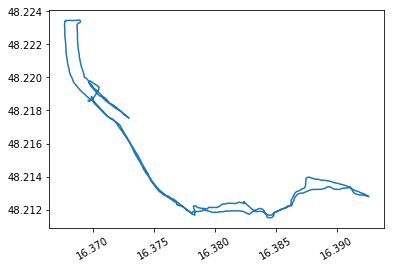

In [7]:
plt.xticks(rotation=30)
plt.plot(df['lon'], df['lat'])

## Basemap

### see also

  http://www.datasciencemadesimple.com/get-maximum-value-column-python-pandas/

In [8]:
# Make edges for basemap
lon_lat_add = .01
lon_min = df['lon'].min() - lon_lat_add
lon_max = df['lon'].max() + lon_lat_add

lat_min = df['lat'].min() - lon_lat_add
lat_max = df['lat'].max() + lon_lat_add

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=16.357687,48.20153,16.402632,48.233454&bboxSR=4269&imageSR=4269&size=1000,710&dpi=300&format=png32&transparent=true&f=image


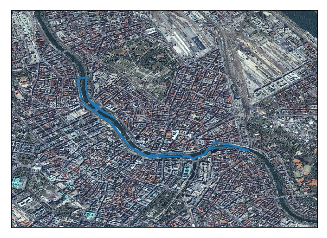

In [16]:
from mpl_toolkits.basemap import Basemap


m = Basemap(  
            llcrnrlon=lon_min, urcrnrlon=lon_max,    
            llcrnrlat=lat_min, urcrnrlat=lat_max,
            epsg=4269,    # Default
            ) 
m.arcgisimage(#service='World_Topo_Map',     
              #service='ESRI_Imagery_World_2D',   
              xpixels = 1000,    # Default 1000, 100 bei World_Topo_Map  
              verbose= True,
              dpi=300
              )
m.plot(df['lon'], df['lat'])

## Comparing to Amazfit Stratos Watch

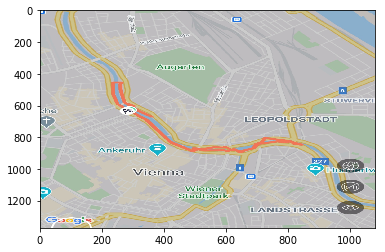

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('./data/IMG_20200903_231240.jpg')
imgplot = plt.imshow(img, aspect='auto')

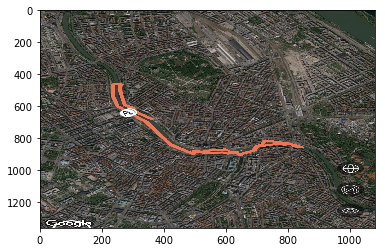

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('./data/IMG_20200903_231302.jpg')
imgplot = plt.imshow(img, aspect='auto')